# Business Case: Netflix - Data Exploration and Visualisation

![alt text](https://akm-img-a-in.tosshub.com/indiatoday/images/story/202012/Netflix-New-Feature-Audio-Only_1200x768.jpeg?9TmAZq3wvsTH1jXQNlPkiSKJprCtGBAx& "Logo Title Text 1")

### Business Problem

  - Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.
  
### Dataset  -  <a href="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv" >Netflix Dataset Link</a>

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

  - **Show_id:** Unique ID for every Movie / Tv Show
  - **Type:** Identifier - A Movie or TV Show
  - **Title:** Title of the Movie / Tv Show
  - **Director:** Director of the Movie
  - **Cast:** Actors involved in the movie/show
  - **Country:** Country where the movie/show was produced
  - **Date_added:** Date it was added on Netflix
  - **Release_year:** Actual Release year of the movie/show
  - **Rating:** TV Rating of the movie/show
  - **Duration:** Total Duration - in minutes or number of seasons
  - **Listed_in:** Genre
  - **Description:** The summary description

# <u> A high level overview of the Neflix Dataset Exploration and Visualization<u>

  - **Loading and inspecting the Dataset**
    - Checking Shape of the Dateset
    - Meaningful Column names
    - Validating Duplicate Records
    - Checking Missing values
    - Unique values (counts) for each Feature
    - Unique values (names) are checked for Features with a unique value count below 100
  - **Dataset Preparation**
    - DataType Validation
    - Dervied Columns
  - **Univariante Analysis**
    - Movies & TV shows - Distribution

### Importing the required libraries or packages for EDA 

In [102]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing Date & Time util modules
from dateutil.parser import parse

## <u> Loading and inspecting the Dataset<u>

### Loading the csv file

In [103]:
netflix_data = pd.read_csv("./netflix.csv")

In [104]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Checking Shape and Column names

In [105]:
netflix_data.shape

(8807, 12)

In [106]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### To make the column names more meaningful, "listed_in" has been changed to "genres".

In [107]:
netflix_data.rename(columns = {"listed_in":"genres"},inplace= True)

### Validating Duplicate Records.

In [108]:
# Dropping Duplicates if any
netflix_data=netflix_data.drop_duplicates()
netflix_data.shape

## No duplicates records found.

(8807, 12)

### Missing Data Anaysis

In [109]:
#Identifying Missing data. Already verified above. To be sure again checking.
total_null = netflix_data.isnull().sum().sort_values(ascending = False)
percent = ((netflix_data.isnull().sum()/netflix_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (Car Data) = ", netflix_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(5)

Total records (Car Data) =  8807


,Total Missing,In Percent
director,2634,29.91
country,831,9.44
cast,825,9.37
date_added,10,0.11
rating,4,0.05


### Inference 
  -  0.11% of total records have missing data for "date_added". These records can be removed while analyzing the "date_added" feature.
  - Missing data will be addressed during the analysis of each column.

### Unique values (counts) for each Feature

In [110]:
netflix_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
genres           514
description     8775
dtype: int64

### Inference 
  - dropping show ID as it is just for reference and no use.
  - Description - 32 movies have the same description. This may be due to movies being released in different languages.

In [111]:
# dropping show ID as it is just for reference and no use.
netflix_data = netflix_data.drop('show_id',axis=1)

### Unique values (names) are checked for Features with a unique value count below 100

In [112]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [113]:
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [114]:
netflix_data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

## <u>Data Preparation<u>

### DataType Validation

In [115]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   genres        8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


### Inference 
  - date_added and release_year is a datetime data type , hence need to update the Dtype

In [117]:
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])

In [118]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   genres        8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 825.7+ KB


### Dervied Columns

  - Added new feature - **"Year Added"** from the **date_added** feature
  - Added new feature - **"Month Added"** from the **date_added** feature
  - Added new feature - **"Day Added"** from the **date_added** feature
  - Added new feature - **"Weekday Added"** from the **date_added** feature

In [119]:
# Creating the copy of the day before manipulating the date time information.
netflix_date = netflix_data.copy()

In [125]:
netflix_date.shape

(8807, 11)

### Removed the missing values before Analysising

In [152]:
netflix_date.dropna(subset = ['date_added'],inplace= True)

In [153]:
netflix_date.shape

(8797, 15)

In [154]:
netflix_date["year_added"] = netflix_date['date_added'].dt.year
netflix_date["year_added"] = netflix_date["year_added"].astype("Int64")
netflix_date["month_added"] = netflix_date['date_added'].dt.month
netflix_date["month_added"] = netflix_date["month_added"].astype("Int64")
netflix_date["day_added"] = netflix_date['date_added'].dt.day
netflix_date["day_added"] = netflix_date["day_added"].astype("Int64")
netflix_date['Weekday_added'] = netflix_date['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))

In [155]:
netflix_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   type           8797 non-null   object        
 1   title          8797 non-null   object        
 2   director       6173 non-null   object        
 3   cast           7972 non-null   object        
 4   country        7967 non-null   object        
 5   date_added     8797 non-null   datetime64[ns]
 6   release_year   8797 non-null   int64         
 7   rating         8793 non-null   object        
 8   duration       8794 non-null   object        
 9   genres         8797 non-null   object        
 10  description    8797 non-null   object        
 11  year_added     8797 non-null   Int64         
 12  month_added    8797 non-null   Int64         
 13  day_added      8797 non-null   Int64         
 14  Weekday_added  8797 non-null   object        
dtypes: Int64(3), datetime

### Analyzing basic statistics about each feature, such as count, min, max, and mean.

In [157]:
netflix_date.describe()

,release_year,year_added,month_added,day_added
count,8797.000000,8797.000000,8797.000000,8797.000000
mean,2014.183472,2018.871888,6.654996,12.497329
std,8.822191,1.574243,3.436554,9.887551
min,1925.000000,2008.000000,1.000000,1.000000
25%,2013.000000,2018.000000,4.000000,1.000000
50%,2017.000000,2019.000000,7.000000,13.000000
75%,2019.000000,2020.000000,10.000000,20.000000
max,2021.000000,2021.000000,12.000000,31.000000


### Inference
  - Netflix has **25%** of movies and TV shows that were released within the **last two years**
  - About **75%** of Netflix's content consists of movies and TV shows **released after 2013**
  - Data from Netflix shows that **new trend movies or TV shows are more prevalent**.
  - For more subscribers, Netflix should invest in **classic Movies and TV shows.**

## <u>Univariante Analysis<u>


#### Feature Name
  - **Type** - Movies & TV shows - Distribution
  - **date_added** - Checking number of new Contents added yearly, monthly, which date and Weekend-Weekday
  - **release_year** - 

### Movies & TV shows - Distribution

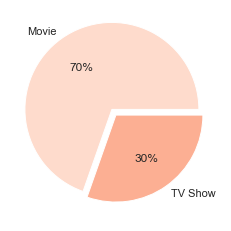

In [213]:
data = netflix_data.groupby("type")['type'].count()

explode=(0.08,0)
labels = ['Movie', 'TV Show']
colors = sns.color_palette("Reds")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

### Inference
  - Netflix has **70%** of its content as movies
  - **Movies** are clearly more **popular on Netflix than TV shows**.


### Checking number of new Contents added yearly

Text(0.5, 0, 'Year on which Movies added on Netflix')

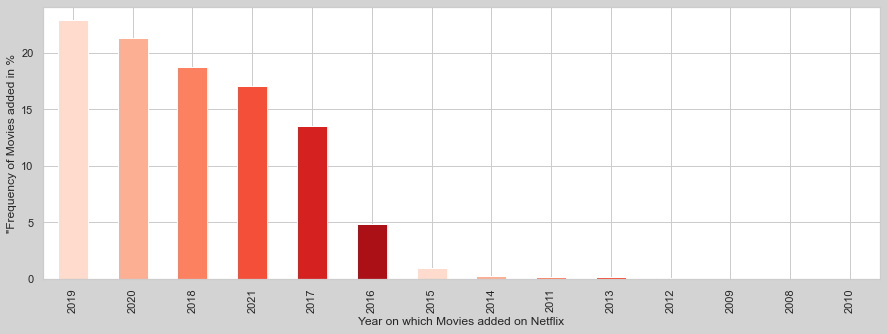

In [220]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count = (netflix_date['year_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.ylabel('"Frequency of Movies added in %', fontsize=12)
plt.xlabel('Year on which Movies added on Netflix', fontsize=12)

<AxesSubplot:xlabel='year_added', ylabel='count'>

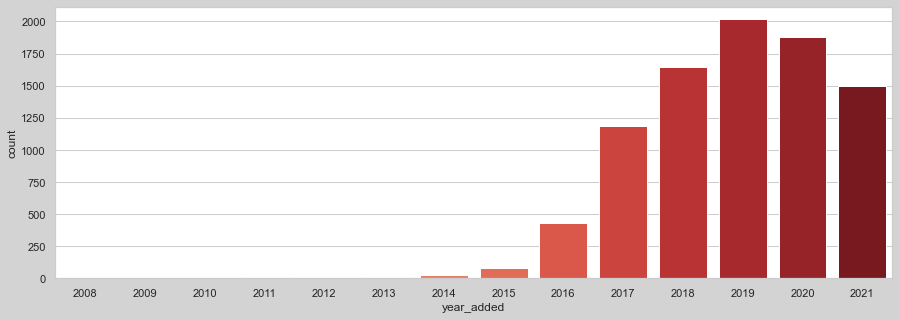

In [221]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'year_added',palette ="Reds")

<AxesSubplot:xlabel='year_added', ylabel='Count'>

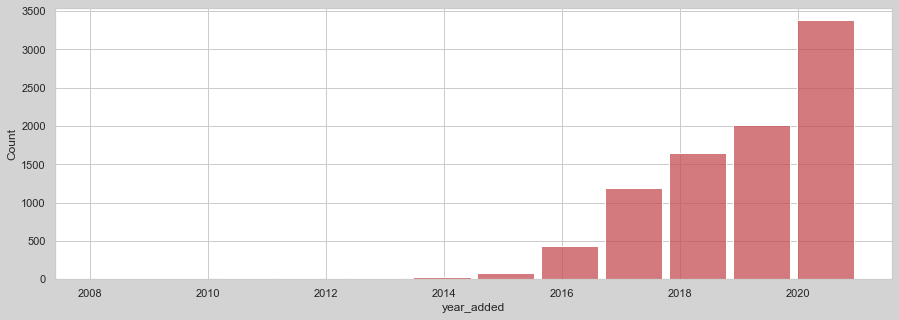

In [209]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.histplot(data=netflix_date,x = 'year_added',bins = 12,color='r', shrink=.9)

### Inference 
  - 

### Checking number of new Contents added montly

<AxesSubplot:xlabel='month_added', ylabel='count'>

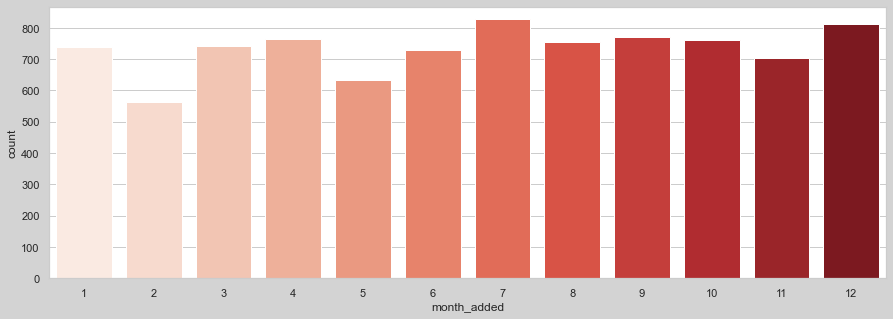

In [208]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'month_added',palette ="Reds")

### Inference

### Checking number of new Contents on Weekends

Text(0.5, 0, 'Year on which Movies added on Netflix')

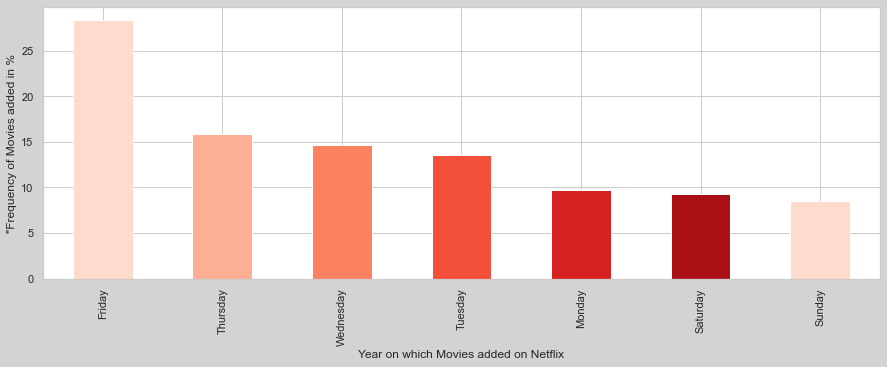

In [222]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count = (netflix_date['Weekday_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.ylabel('"Frequency of Movies added in %', fontsize=12)
plt.xlabel('Year on which Movies added on Netflix', fontsize=12)

<AxesSubplot:xlabel='Weekday_added', ylabel='count'>

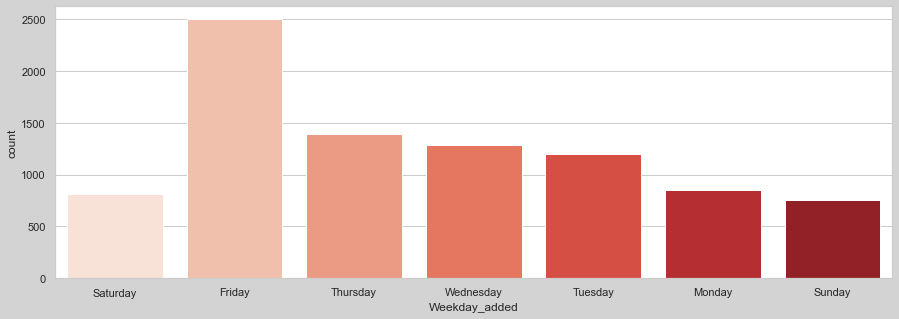

In [207]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'Weekday_added',palette ="Reds")

### Inference

Text(0.5, 0, 'Date on which Movies added on Netflix')

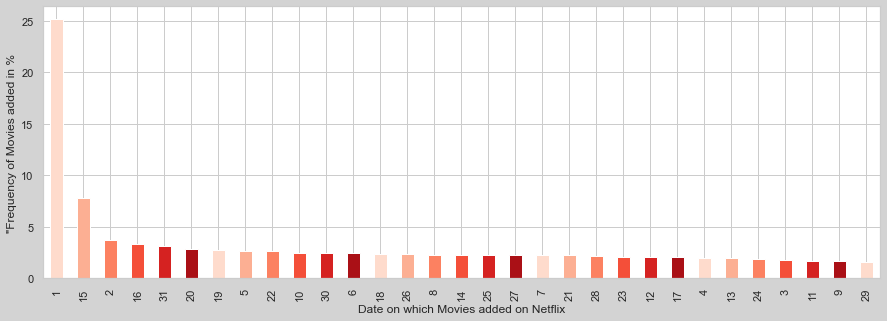

In [206]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count = (netflix_date['day_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.ylabel('"Frequency of Movies added in %', fontsize=12)
plt.xlabel('Date on which Movies added on Netflix', fontsize=12)

<AxesSubplot:xlabel='release_year', ylabel='count'>

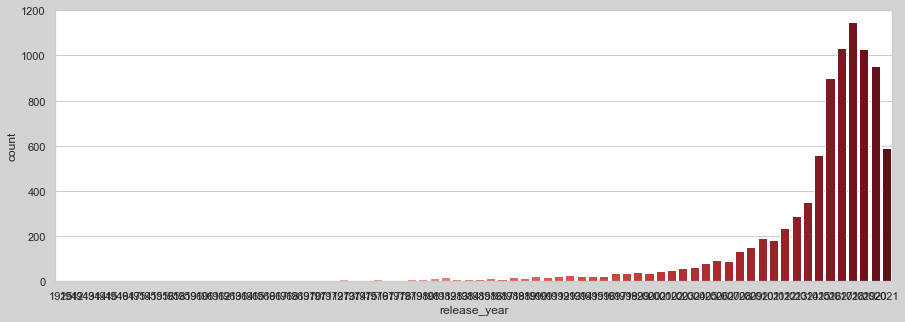

In [217]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'release_year',palette ="Reds")

<AxesSubplot:xlabel='release_year', ylabel='Count'>

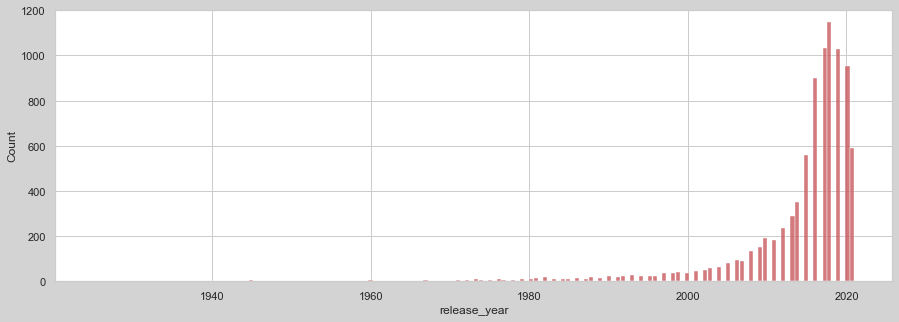

In [216]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.histplot(data=netflix_date,x = 'release_year',color='r', shrink=.9)

<AxesSubplot:xlabel='day_added', ylabel='count'>

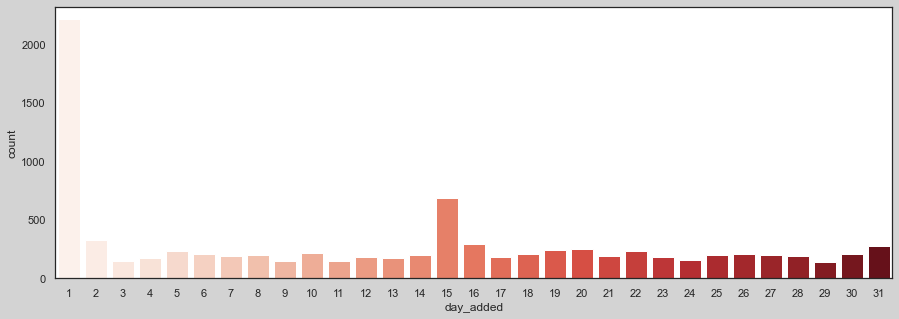

In [198]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'day_added',palette ="Reds")

In [ ]:
### Inferences
 - 

<AxesSubplot:xlabel='day_added', ylabel='Count'>

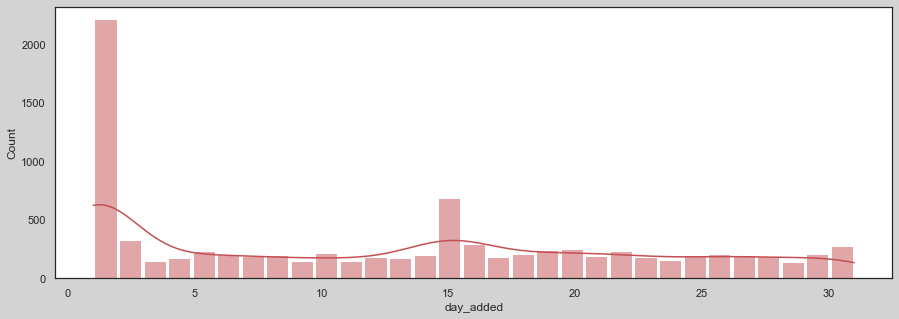

In [197]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")
sns.histplot(data=netflix_date,x = 'day_added',bins = 31,kde=True,color='r', shrink=.9)

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")

<AxesSubplot:xlabel='month_added', ylabel='count'>

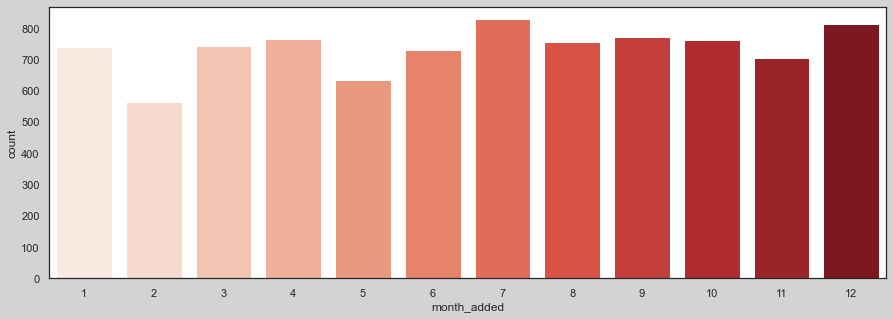

<AxesSubplot:xlabel='month_added', ylabel='Count'>

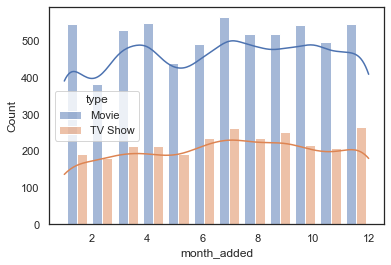

In [178]:
sns.histplot(data=netflix_date,x = 'month_added',bins = 12,kde=True,hue="type",multiple="dodge", shrink=.8)

In [92]:
fig = plt.figure(figsize=(40,100))
sns.set(style='white')
fig.set_facecolor("lightgrey")

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.scatterplot(data=netflix_date, x='CPU_Usg_mhz', y='Mem_Usg_kb',hue="Weekday")
plt.subplot(2,2,2)
sns.scatterplot(data=netflix_date, x='CPU_Usg_mhz', y='disk_r_tp_kb',hue="Weekday")

In [93]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   genres        8807 non-null   object        
 10  description   8807 non-null   object        
 11  year_added    8797 non-null   Int64         
 12  month_added   8797 non-null   Int64         
 13  day_added     8797 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(1), object(9)
memory usage: 1.0+ MB


In [95]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,day_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24


In [ ]:
netflix_data = netflix_data['date_added'].dt.year

In [99]:
netflix_date = netflix_data[['date_added']].dropna()

In [100]:
netflix_date['Weekday'] = netflix_date['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))

In [101]:
netflix_date.head()

,date_added,Weekday
0,2021-09-25,Saturday
1,2021-09-24,Friday
2,2021-09-24,Friday
3,2021-09-24,Friday
4,2021-09-24,Friday


## Inferences 
  - 

## Inferences 
  - We see 40% more **Movies** than **TV Shows** on Netflix.

In [24]:
netflix_data_v1[['genre_1','genre_2','genre_3']] = netflix_data['genres'].str.split(',', expand=True)

In [52]:
netflix_data_v1['genre_1'].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies'],
      dtype=object)

In [21]:
netflix_data_v1.head()

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies


In [28]:
netflix_data.head()

,type,movie_title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,year_month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [14]:
netflix_data['cast'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
8804,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
netflix_data_v1 = netflix_data['listed_in'].str.split(',', expand=True)

In [19]:
netflix_data_v1.iloc[:,0].value_counts()

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           774
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 253
Docuseries                       221
Anime Series                     176
International Movies             128
TV Comedies                      120
Reality TV                       120
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Classic & Cult TV                 22
Anime Features                    21
Independent Movies                20
Music & Musicals                  18
T

In [23]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [24]:
unique_items = to_1D(netflix_data["listed_in"]).value_counts()

In [25]:
unique_items

     30414
e    25225
i    21515
n    20760
a    19931
o    19865
s    19615
t    14879
r    14384
,    10516
m     9057
l     7647
v     6714
d     6684
M     6535
T     6367
V     5506
I     4859
c     4682
h     4677
D     4454
S     4362
C     4008
u     3542
w     2910
&     2611
A     2301
y     1785
p     1613
F     1431
R     1241
-      900
K      602
'      451
H      432
U      399
B      355
g      348
L      276
G      102
Q      102
N       92
k       56
dtype: int64

In [20]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [22]:
netflix_data_v2 = boolean_df(netflix_data["listed_in"], unique_items.keys())

NameError: name 'unique_items' is not defined

In [11]:
netflix_data_v1 = netflix_data["listed_in"].apply(pd.Series)

In [12]:
netflix_data_v1.head()

,0
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [30]:
s = "Docuseries, Reality TV"
l1 = list(lambda s : s.split(","))

TypeError: 'function' object is not iterable

In [29]:
l1

<function __main__.<lambda>(s)>